<a href="https://colab.research.google.com/github/LPValente/TensorFlow2.0/blob/main/TF2_0_Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Install TensorFlow
!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-beta1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-beta1
2.12.0


In [14]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

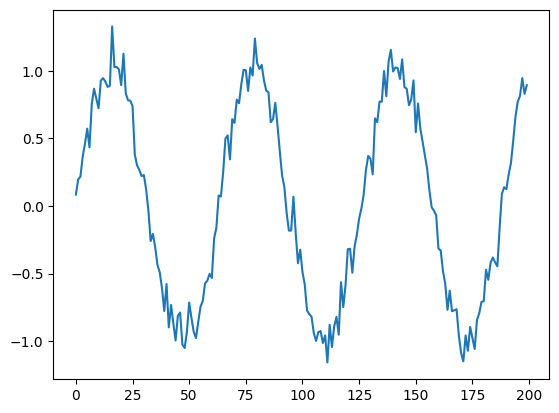

In [15]:
# make the original data
series = np.sin(0.1*np.arange(200)) #+ np.random.randn(200)*0.1 # remove comment of random part to add noise

#plot it
plt.plot(series)
plt.show()

In [16]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [17]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1),
)

# train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 1s 90ms/step - loss: 0.5130 - val_loss: 0.3490
Epoch 2/80
3/3 [==============================] - 0s 27ms/step - loss: 0.2530 - val_loss: 0.1003
Epoch 3/80
3/3 [==============================] - 0s 27ms/step - loss: 0.1486 - val_loss: 0.0886
Epoch 4/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0772 - val_loss: 0.1055
Epoch 5/80
3/3 [==============================] - 0s 48ms/step - loss: 0.0999 - val_loss: 0.0764
Epoch 6/80
3/3 [==============================] - 0s 48ms/step - loss: 0.0562 - val_loss: 0.0865
Epoch 7/80
3/3 [==============================] - 0s 30ms/step - loss: 0.0815 - val_loss: 0.0792
Epoch 8/80
3/3 [==============================] - 0s 29ms/step - loss: 0.0538 - val_loss: 0.0627
Epoch 9/80
3/3 [==============================] - 0s 28ms/step - loss: 0.0621 - val_loss: 0.0425
Epoch 10/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0311 - val_loss: 0.0458
Epoch 11/80
3/3 [============

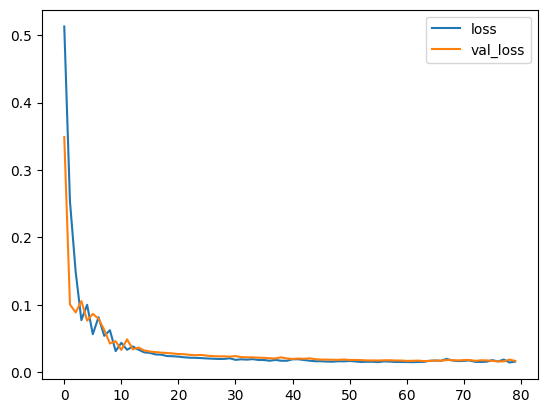

In [18]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label="val_loss")
plt.legend()

In [19]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

1/1 [==============================] - 0s 42ms/step


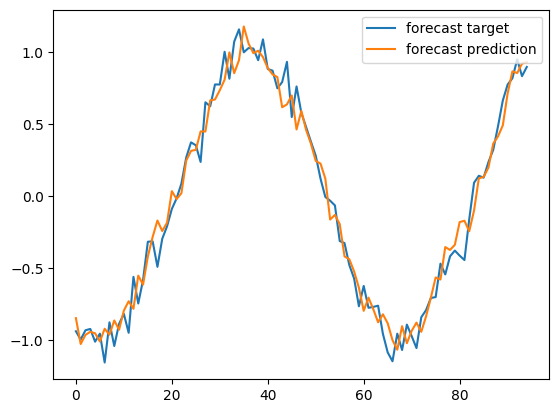

In [20]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [21]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0] # 1x1 array -> scalar

  # update the predctions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p


1/1 [==============================] - 0s 22ms/step


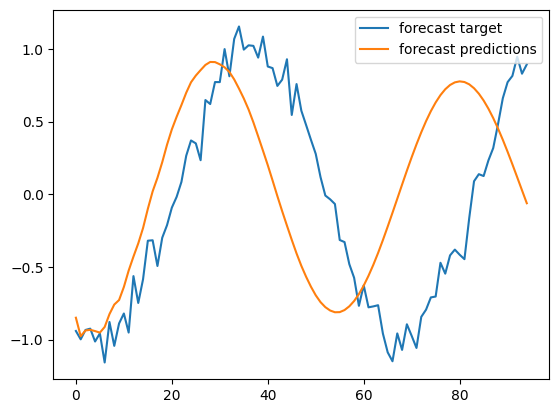

In [22]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast predictions')
plt.legend()